# Import Required Packages

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, f1_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import pandas as pd
import seaborn as sns
import numpy as np
import cv2
import tensorflow as tf
import os
import random
from tensorflow import keras

# Import the dataset

In [ ]:
cancer_ds = load_breast_cancer()

cancer_ds

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [ ]:
cancer_ds.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# create the dataframe

df = pd.DataFrame(data = cancer_ds.data, columns=cancer_ds.feature_names)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df['target'] = cancer_ds.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[(0.0, 10.0)]

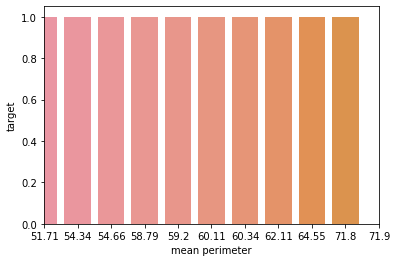

In [ ]:
b_plot = sns.barplot(df.loc[:100, 'mean perimeter'], df.loc[:100, 'target'])
b_plot.set(xlim=(0, 10))

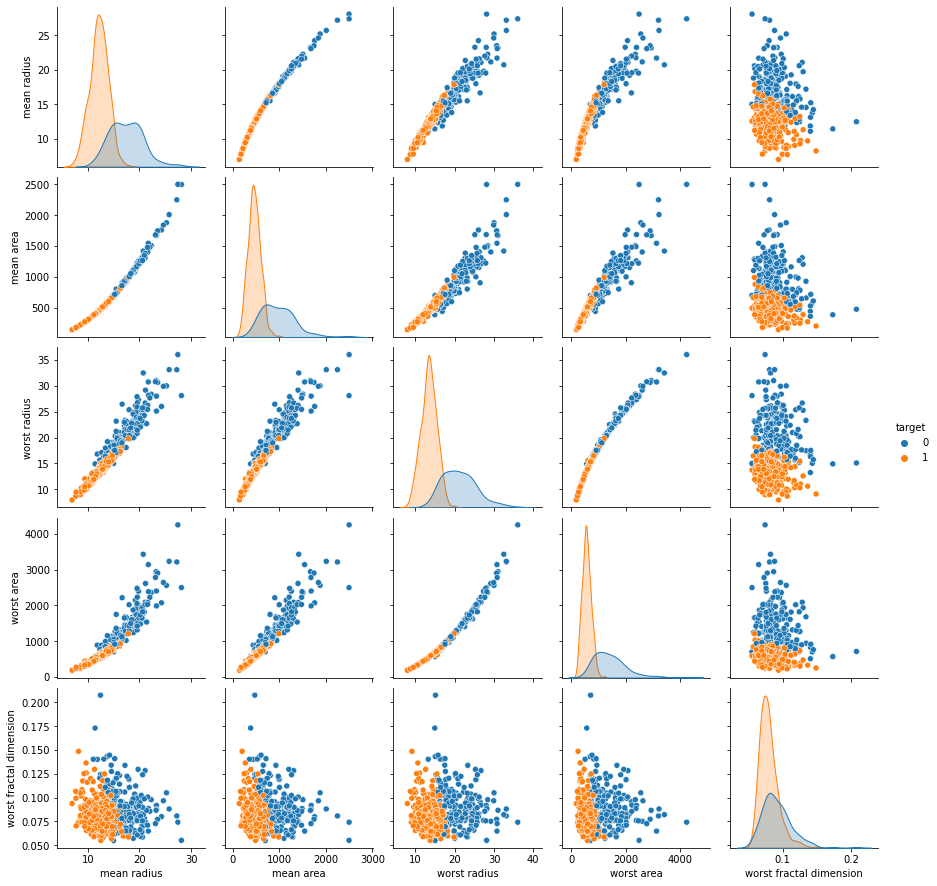

In [ ]:
sns.pairplot(df.loc[:, ['mean radius', 'mean area', 'worst radius', 'worst area', 'worst fractal dimension', 'target']], hue='target')

# Splitting Dataset

In [ ]:
X = df.loc[:, :'worst fractal dimension']
y = df.loc[:, 'target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# **K Means Clustering**

In [ ]:
k_means_model = KMeans(n_clusters=6, max_iter=230)

k_means_model.fit(X, y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=230,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
y_k_means_predict = k_means_model.predict(X)

In [ ]:
model_centers = k_means_model.cluster_centers_

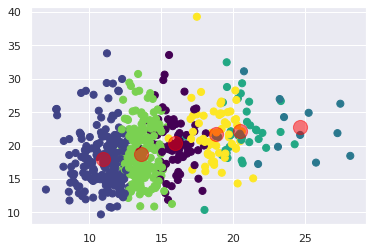

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_k_means_predict, s=50, cmap='viridis')

plt.scatter(model_centers[:, 0], model_centers[:, 1], c='red', s=200, alpha=0.5)

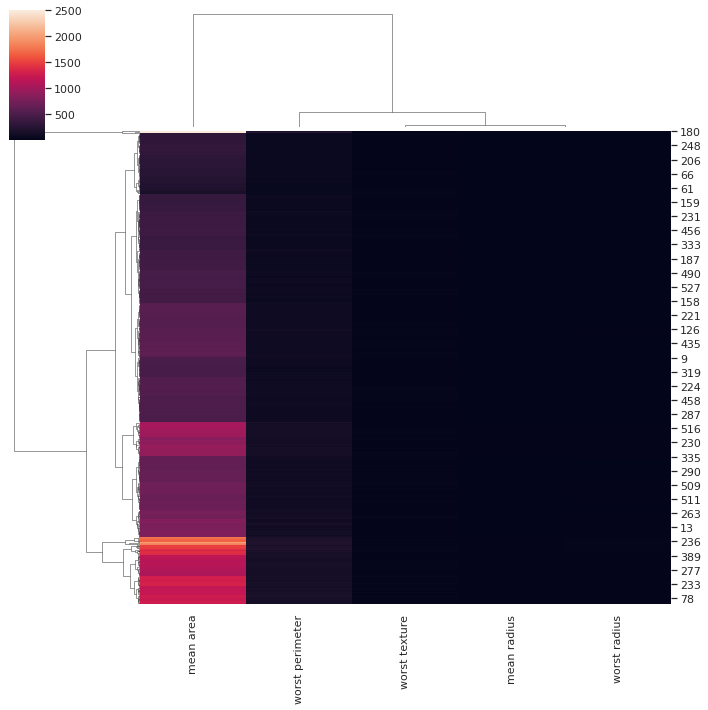

In [ ]:
test_df = df.drop('target', axis=1)

sns.set_theme(color_codes=True)
sns.clustermap(test_df.loc[:, ['mean radius', 'mean area', 'worst radius', 'worst texture', 'worst perimeter']])

In [ ]:
print("\nK Means Accuracy Score : ", accuracy_score(y, y_k_means_predict), '\n')

print("<-------------- Report ---------------->")
print('\n', classification_report(y, y_k_means_predict), '\n')


K Means Accuracy Score :  0.46572934973637964 

<-------------- Report ---------------->

               precision    recall  f1-score   support

           0       0.87      0.29      0.44       212
           1       0.98      0.57      0.72       357
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.47       569
   macro avg       0.31      0.14      0.19       569
weighted avg       0.94      0.47      0.61       569
 



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


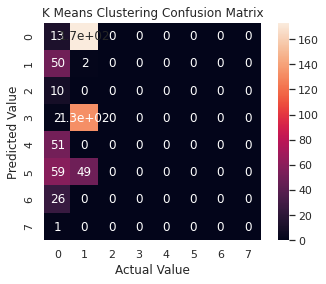

In [ ]:
mat = confusion_matrix(y, y_k_means_predict)
sns.heatmap(mat.T, square=True, annot=True)
plt.title('K Means Clustering Confusion Matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value');

# **Stochastic Gradient Descent Classifier**

In [ ]:
sdc_model = SGDClassifier(max_iter=1000, tol=1e-3)

sdc_model.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_sdc_predict = sdc_model.predict(X)

In [ ]:
print("\nSDC Accuracy Score : ", accuracy_score(y, y_sdc_predict), '\n')

print("<-------------- Report ---------------->")
print('\n', classification_report(y, y_sdc_predict), '\n')


SDC Accuracy Score :  0.9191564147627417 

<-------------- Report ---------------->

               precision    recall  f1-score   support

           0       0.92      0.86      0.89       212
           1       0.92      0.95      0.94       357

    accuracy                           0.92       569
   macro avg       0.92      0.91      0.91       569
weighted avg       0.92      0.92      0.92       569
 



In [ ]:
scaler_sdc_model = make_pipeline(StandardScaler(), SGDClassifier())

scaler_sdc_model.fit(X, y)

scaler_y_sdc_predict = scaler_sdc_model.predict(X)

In [ ]:
print("\nScaler SDC Accuracy Score : ", accuracy_score(y, scaler_y_sdc_predict), '\n')

print("<-------------- Report ---------------->")
print('\n', classification_report(y, scaler_y_sdc_predict), '\n')


Scaler SDC Accuracy Score :  0.984182776801406 

<-------------- Report ---------------->

               precision    recall  f1-score   support

           0       1.00      0.96      0.98       212
           1       0.98      1.00      0.99       357

    accuracy                           0.98       569
   macro avg       0.99      0.98      0.98       569
weighted avg       0.98      0.98      0.98       569
 



Text(0, 0.5, 'Actual vs Predicted')

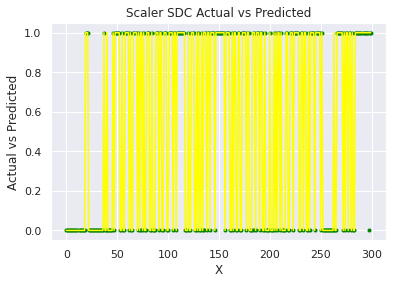

In [ ]:
np_test = np.arange(len(y)-269).reshape((len(y)-269, 1))

plt.scatter(np_test, y[:300], color='green', marker='.')
plt.plot(np_test, scaler_y_sdc_predict[:300], color='yellow')
plt.title('Scaler SDC Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('Actual vs Predicted')

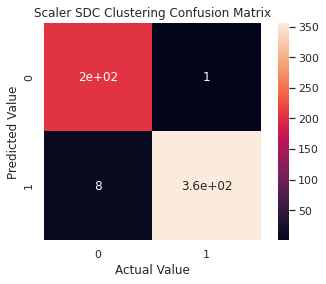

In [ ]:
mat = confusion_matrix(y, scaler_y_sdc_predict)
sns.heatmap(mat.T, square=True, annot=True)
plt.title('Scaler SDC Clustering Confusion Matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value');

# **Support Vector Machine**

In [ ]:
C = 1.0

poly_svc_model = SVC(kernel = 'poly', C=C, degree=3)

rbf_svc_model = SVC(kernel = 'rbf', C=C)

sigmoid_svc_model = SVC(kernel = 'sigmoid', C=C, gamma=0.8)

In [ ]:
poly_svc_model.fit(X, y)
rbf_svc_model.fit(X, y)
sigmoid_svc_model.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.8, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_poly_svc_predict = poly_svc_model.predict(X)
y_rbf_svc_predict = rbf_svc_model.predict(X)
y_sigmoid_svc_predict = sigmoid_svc_model.predict(X)

In [ ]:
print("Polynomial SVM Accuracy Score: ", accuracy_score(y, y_poly_svc_predict), "\n\n")

print(classification_report(y, y_poly_svc_predict), '\n')

Polynomial SVM Accuracy Score:  0.9138840070298769 


              precision    recall  f1-score   support

           0       0.96      0.81      0.87       212
           1       0.89      0.98      0.93       357

    accuracy                           0.91       569
   macro avg       0.93      0.89      0.90       569
weighted avg       0.92      0.91      0.91       569
 



In [ ]:
print("\nRBF SVM Accuracy Score : ", accuracy_score(y, y_rbf_svc_predict), "\n")

print(classification_report(y, y_rbf_svc_predict), '\n')


RBF SVM Accuracy Score :  0.9226713532513181 

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       212
           1       0.90      0.98      0.94       357

    accuracy                           0.92       569
   macro avg       0.93      0.90      0.91       569
weighted avg       0.93      0.92      0.92       569
 



In [ ]:
print("\Sigmoid SVM Accuracy Score : ", accuracy_score(y, y_sigmoid_svc_predict), "\n")

print(classification_report(y, y_sigmoid_svc_predict), '\n')

\Sigmoid SVM Accuracy Score :  0.6274165202108963 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       212
           1       0.63      1.00      0.77       357

    accuracy                           0.63       569
   macro avg       0.31      0.50      0.39       569
weighted avg       0.39      0.63      0.48       569
 



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(80.90000000000006, 0.5, 'Predicted Value')

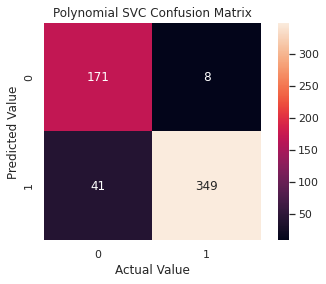

In [ ]:
mat = confusion_matrix(y, y_poly_svc_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d')
plt.title('Polynomial SVC Confusion Matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

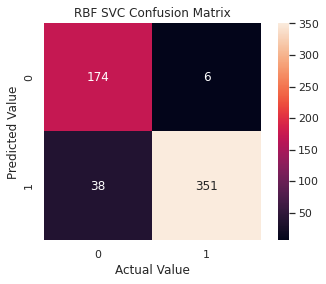

In [ ]:
mat = confusion_matrix(y, y_rbf_svc_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d')
plt.title('RBF SVC Confusion Matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value');

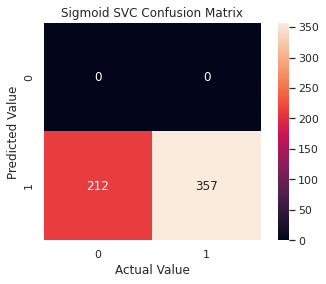

In [ ]:
mat = confusion_matrix(y, y_sigmoid_svc_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d')
plt.title('Sigmoid SVC Confusion Matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value');

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'Polynomial SVM Decision Region Boundary')

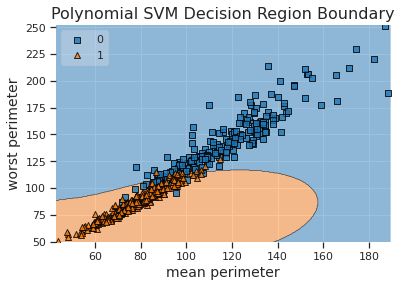

In [ ]:
test_X_df = df[['mean perimeter', 'worst perimeter']]
test_y = df['target']

test_rbf_svc_model = SVC(kernel = 'rbf', C=C)
test_rbf_svc_model.fit(test_X_df, test_y)

plot_decision_regions(test_X_df.values, test_y.values, clf=test_rbf_svc_model, legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(test_X_df.columns[0], size=14)
plt.ylabel(test_X_df.columns[1], size=14)
plt.title('Polynomial SVM Decision Region Boundary', size=16)

# **Artificial Neural Network** (ANN)

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
data_drive_path = '/content/gdrive/My Drive/datasets/originals'

In [ ]:
def loadImages(path, subfolder_path):
  image_files = sorted([os.path.join(path, subfolder_path, file) for file in os.listdir(path + '/' + subfolder_path) if file.endswith('.bmp')])
  return image_files

def displayImage(img, title = "Originals"):
  plt.imshow(img, cmap='gray',)
  plt.title(title)
  plt.show()

def resizeImage(width, height, img):
  dim = (width, height)
  return cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)

def getImgShape(img):
  try:
    return img.shape
  except AttributeError:
    return "Shape not found"

In [ ]:
# m -> malignant
# b -> benign

m_path_dataset = loadImages(data_drive_path, 'malignant')
b_path_dataset = loadImages(data_drive_path, 'benign')

In [ ]:
m_path_dataset[0]

'/content/gdrive/My Drive/datasets/originals/malignant/us101.bmp'

In [ ]:
m_img_ds = [cv2.imread(i, cv2.IMREAD_GRAYSCALE) for i in m_path_dataset]
b_img_ds = [cv2.imread(i, cv2.IMREAD_GRAYSCALE) for i in b_path_dataset]

In [ ]:
m_img_ds[0]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [ 53,  54,  57, ...,  85,  62, 143],
       [ 53,  56,  55, ...,  98,  59, 150],
       [ 49,  55,  52, ...,  93,   0,   0]], dtype=uint8)

In [ ]:
getImgShape(m_img_ds[0])

(113, 137)

In [ ]:
getImgShape(b_img_ds[0])

(75, 95)

In [ ]:
processed_m_img_ds = [resizeImage(95, 75, i) for i in m_img_ds]
processed_b_img_ds = [resizeImage(95, 75, i) for i in b_img_ds]

processed_m_img_ds[0]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [ 60,  69,  79, ...,  81,  78, 108],
       [ 53,  56,  69, ...,  90,  79, 126],
       [ 51,  54,  59, ...,  97,  68,  33]], dtype=uint8)

In [ ]:
getImgShape(processed_m_img_ds[0])

(75, 95)

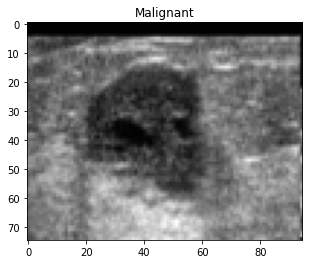

In [ ]:
displayImage(processed_m_img_ds[0], 'Malignant')

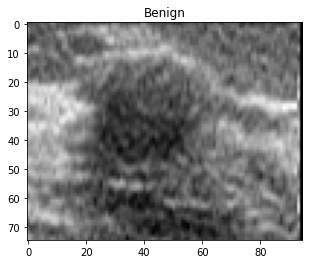

In [ ]:
displayImage(b_img_ds[0], 'Benign')

In [ ]:
m_target = np.zeros((len(processed_m_img_ds), 1), dtype=int)

m_target.shape

(150, 1)

In [ ]:
m_target[0]

array([0])

In [ ]:
b_target = np.ones((len(b_img_ds), 1), dtype=int)

b_target.shape

(100, 1)

In [ ]:
b_target[0]

array([1])

In [ ]:
m_b_target_ds = np.concatenate((m_target, b_target), axis=0)

m_b_target_ds.shape

(250, 1)

In [ ]:
# combine the both dataset

m_b_img_ds = np.concatenate((processed_m_img_ds, processed_b_img_ds), axis=0)

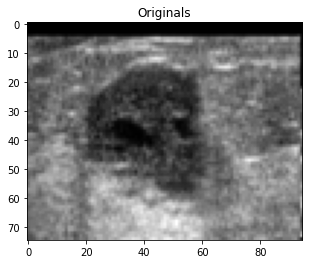

In [ ]:
displayImage(m_b_img_ds[0])

In [ ]:
m_b_img_ds.shape

(250, 75, 95)

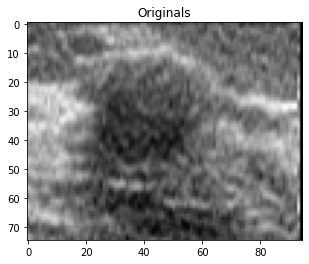

In [ ]:
displayImage(m_b_img_ds[150])

In [ ]:
len(m_b_img_ds)

250

In [ ]:
# shuffle the dataset

img_ds = list()
target_ds = list()

m_b_img_ds = list(m_b_img_ds)
m_b_target_ds = list(m_b_target_ds)

for i in range(len(m_b_img_ds)):
  index = random.choice(range(len(m_b_img_ds)))

  img_ds.append(m_b_img_ds[index])
  target_ds.append(m_b_target_ds[index])

  m_b_img_ds.pop(index)
  m_b_target_ds.pop(index)

img_ds = np.array(img_ds)
target_ds = np.array(target_ds)

In [ ]:
print(img_ds.shape, target_ds.shape)

(0,) (0,)


In [ ]:
# calculate the percentage for train and test

250 * 0.2

50.0

In [ ]:
# split the dataset into train and test

X_ann_train, X_ann_test = img_ds[:200], img_ds[200:]
y_ann_train, y_ann_test = target_ds[:200], target_ds[200:]

In [ ]:
# now flatten the X dataset.
# more data will take more time.
# so first we have to flatten the datas into simplified dataset

flattened_X_ann_train = X_train.reshape(len(X_ann_train), 75*95)

flattened_X_ann_train.shape

(200, 7125)

In [ ]:
flattened_X_ann_test = X_test.reshape(len(X_ann_test), 75*95)

flattened_X_ann_test.shape

(50, 7125)

In [ ]:
# create the instance of ANN

ann_model = keras.Sequential([
      keras.layers.Dense(10, input_shape=(7125,), activation='sigmoid')
])

ann_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# train the model

ann_model.fit(flattened_X_ann_train, y_ann_train, epochs=5)

Epoch 1/5
7/7 [==============================] - 0s 3ms/step - loss: 113.8947 - accuracy: 0.3690
Epoch 2/5
7/7 [==============================] - 0s 3ms/step - loss: 171.3537 - accuracy: 0.5204
Epoch 3/5
7/7 [==============================] - 0s 3ms/step - loss: 79.5353 - accuracy: 0.5631
Epoch 4/5
7/7 [==============================] - 0s 3ms/step - loss: 80.0133 - accuracy: 0.6362
Epoch 5/5
7/7 [==============================] - 0s 3ms/step - loss: 27.8658 - accuracy: 0.8151


In [ ]:
# evaluate the model

print(ann_model.evaluate(flattened_X_ann_test, y_ann_test))

2/2 [==============================] - 0s 6ms/step - loss: 36.9034 - accuracy: 0.7600
[36.90342330932617, 0.7599999904632568]


In [ ]:
# now the scale the X dataset

flattened_scaled_X_ann_train = flattened_X_ann_train / 255
flattened_scaled_X_ann_test = flattened_X_ann_test / 255

In [ ]:
# create the instance of ANN

ann_model_0 = keras.Sequential([
      keras.layers.Dense(10, input_shape=(7125,), activation='sigmoid')
])

ann_model_0.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# fit the model

ann_model_0.fit(flattened_scaled_X_ann_train, y_ann_train, epochs=5)

Epoch 1/5
7/7 [==============================] - 0s 3ms/step - loss: 1.3765 - accuracy: 0.3277
Epoch 2/5
7/7 [==============================] - 0s 3ms/step - loss: 0.7325 - accuracy: 0.5383
Epoch 3/5
7/7 [==============================] - 0s 3ms/step - loss: 0.7135 - accuracy: 0.5609
Epoch 4/5
7/7 [==============================] - 0s 3ms/step - loss: 0.5061 - accuracy: 0.7396
Epoch 5/5
7/7 [==============================] - 0s 3ms/step - loss: 0.4087 - accuracy: 0.8473


In [ ]:
# evaluate the model

print(ann_model_0.evaluate(flattened_scaled_X_ann_test, y_ann_test))

2/2 [==============================] - 0s 5ms/step - loss: 0.4894 - accuracy: 0.8200
[0.4893801510334015, 0.8199999928474426]


In [ ]:
y_ann_0_predicted = ann_model_0.predict(flattened_scaled_X_ann_test)

Text(0, 0.5, 'Actual vs Predicted')

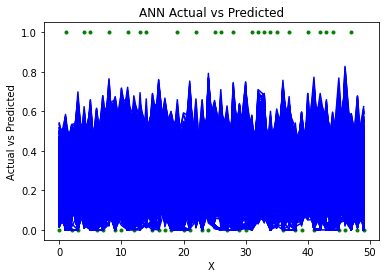

In [ ]:
np_test = np.arange(len(y_ann_test)).reshape((len(y_ann_test), 1))

plt.scatter(np_test, y_ann_test, color='green', marker='.')
plt.plot(np_test, flattened_scaled_X_ann_test, color='blue')
plt.title('ANN Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('Actual vs Predicted')

# **All Model Accuracy Scores**

In [ ]:
print("\nK Means Accuracy Score : ", accuracy_score(y, y_k_means_predict), '\n')
print("\nScaler SDC Accuracy Score : ", accuracy_score(y, scaler_y_sdc_predict), '\n')
print("\nPolynomial SVM Accuracy Score: ", accuracy_score(y, y_poly_svc_predict), "\n")
print("\nRBF SVM Accuracy Score : ", accuracy_score(y, y_rbf_svc_predict), "\n")
print("\nSigmoid SVM Accuracy Score : ", accuracy_score(y, y_sigmoid_svc_predict), "\n")
print("\nANN Accuracy Score : ", ann_model_0.evaluate(flattened_scaled_X_ann_test, y_ann_test)[1], '\n')


K Means Accuracy Score :  0.46572934973637964 


Scaler SDC Accuracy Score :  0.984182776801406 


Polynomial SVM Accuracy Score:  0.9138840070298769 


RBF SVM Accuracy Score :  0.9226713532513181 


Sigmoid SVM Accuracy Score :  0.6274165202108963 

2/2 [==============================] - 0s 4ms/step - loss: 0.4894 - accuracy: 0.8200

ANN Accuracy Score :  0.8199999928474426 

